In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sortedcontainers import SortedList
from datetime import datetime

In [3]:
#загрузка данных
df = pd.read_csv('./data/Iris.csv').set_index(['Id'])

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [6]:
from mpl_toolkits.mplot3d import Axes3D

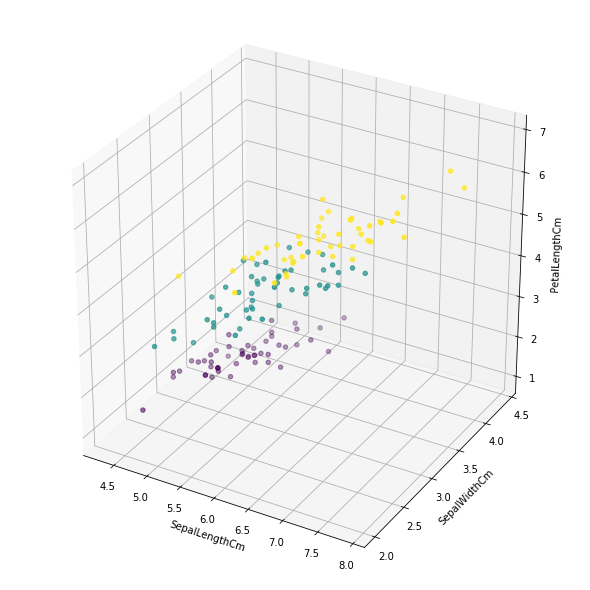

In [7]:
fig = plt.figure(figsize=(8, 8))

ax = Axes3D(fig)

ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], marker='o')
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

plt.show()

In [8]:
#Загрузка и обновление данных
#На вход поступает датасет, коэффициент для нормализации и количество признаков(по умолчанию все данные)
def get_data(d, n = 1, limit=None):
    print("Reading in and transforming data...")
    data = d.values
    np.random.shuffle(data) #перемешиваем исходные данные
    X = data[:,:-1] / n #масштабируем признаки для того чтобы они находились в интервале от 0 до 1
    Y = data[:, -1] #первый столбец -целевая переменная, остальная часть -признаки
    if limit is not None: #реализуем возможность управления количеством получаеммых данных
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [9]:
#X, Y = get_data(df, 8, 10)

In [10]:
#X

In [11]:
class KNN(object):
    def __init__(self, k):
        self.k = k

    def fit(self, X, y): #сохраняет X и y
        self.X = X
        self.y = y

    def predict(self, X):
        y = np.zeros(len(X))
        for i,x in enumerate(X): # test points
            sl = SortedList() # stores (distance, class) tuples
            for j,xt in enumerate(self.X): # training points
                diff = x - xt
                d = diff.dot(diff)
                if len(sl) < self.k:
                    # don't need to check, just add
                    sl.add( (d, self.y[j]) )
                else:
                    if d < sl[-1][0]:
                        del sl[-1]
                        sl.add( (d, self.y[j]) )
            # print "input:", x
            # print "sl:", sl

            # vote
            votes = {}
            for _, v in sl:
                #print ("v:", v)
                votes[v] = votes.get(v,0) + 1   
            #print ("votes:", votes, "true:", Ytest[i])
            max_votes = 0
            max_votes_class = -1
            for v,count in iter(votes.items()):
                if count > max_votes:
                    max_votes = count
                    max_votes_class = v
            y[i] = max_votes_class
        return y

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

Reading in and transforming data...

k = 1
Training time: 0:00:00.000007
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.004270 Train size: 30
Test accuracy: 0.9166666666666666
Time to compute test accuracy: 0:00:00.018620 Test size: 120

k = 2
Training time: 0:00:00.000003
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.004362 Train size: 30
Test accuracy: 0.9166666666666666
Time to compute test accuracy: 0:00:00.014590 Test size: 120

k = 3
Training time: 0:00:00.000003
Train accuracy: 0.9333333333333333
Time to compute train accuracy: 0:00:00.004924 Train size: 30
Test accuracy: 0.925
Time to compute test accuracy: 0:00:00.015649 Test size: 120

k = 4
Training time: 0:00:00.000003
Train accuracy: 1.0
Time to compute train accuracy: 0:00:00.005063 Train size: 30
Test accuracy: 0.9333333333333333
Time to compute test accuracy: 0:00:00.016655 Test size: 120

k = 5
Training time: 0:00:00.000002
Train accuracy: 0.9333333333333333
Time to compute train accuracy: 0:

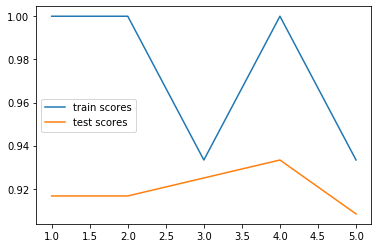

In [12]:
#подбираем гиперпараметры
if __name__ == '__main__':
    X, Y = get_data(df, 7.9, 150)
    Ntrain = 30
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    train_scores = []
    test_scores = []
    ks = (1,2,3,4,5)
    for k in ks:
        print("\nk =", k)
        knn = KNN(k)
        t0 = datetime.now()
        knn.fit(Xtrain, Ytrain)
        print("Training time:", (datetime.now() - t0))

        t0 = datetime.now()
        train_score = knn.score(Xtrain, Ytrain)
        train_scores.append(train_score)
        print("Train accuracy:", train_score)
        print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

        t0 = datetime.now()
        test_score = knn.score(Xtest, Ytest)
        print("Test accuracy:", test_score)
        test_scores.append(test_score)
        print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

    plt.plot(ks, train_scores, label='train scores')
    plt.plot(ks, test_scores, label='test scores')
    plt.legend()
    plt.show()

In [149]:
#так как лучший результат был получен на K=3 обучаем модель с этим параметром   
    X, Y = get_data(df, 7.9, 150)
    Ntrain = 30
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    k = 3

    knn = KNN(k)
    knn.fit(Xtrain, Ytrain)
    train_score = knn.score(Xtrain, Ytrain)
    print("Train accuracy:", train_score)

    test_score = knn.score(Xtest, Ytest)
    print("Test accuracy:", test_score)

Reading in and transforming data...
Train accuracy: 1.0
Test accuracy: 0.9416666666666667


In [150]:
Ypred = knn.predict(Xtest)

In [151]:
#сравним фактические данные с результатами предсказания
df1 = pd.DataFrame({'Actual': Ytest, 'Predicted': Ypred})
df1.head(5)

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,2.0,2.0
3,2.0,2.0
4,1.0,1.0


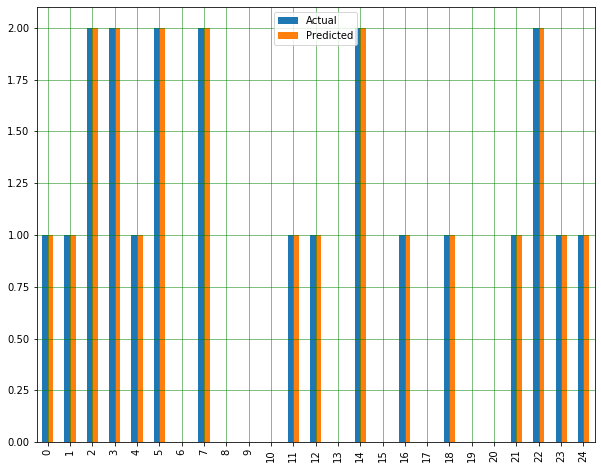

In [152]:
#построим график по результатам предсказания(сравнение фактических данных с предсказанными)
df2 = df1.head(25)
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [153]:
#строим матрица несоответствий
confusion_matrix = pd.crosstab(df1['Actual'], df1['Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted  0.0  1.0  2.0
Actual                  
0.0         39    0    0
1.0          0   40    2
2.0          0    5   34


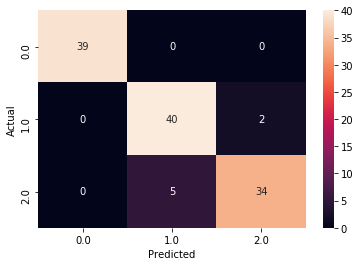

In [155]:
sn.heatmap(confusion_matrix, annot=True)
plt.show()